# K Nearest Neighbours in kd-Trees
## Team members : 
1. Kartik Kadur
2. Sayali Barve

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import math
import random
import kdtree
import time

from plyfile import PlyData, PlyElement

## Read the points from the ply file.

In [2]:
plyfile = "points_4.ply"
data = PlyData.read(plyfile)
points = list(zip(data.elements[0].data["x"],\
                          data.elements[0].data["y"]))
points = sorted(points, key=lambda x : x[0])
print("Points : \n{}".format(points))

Points : 
[(-8191.0952835079, -3739.2751825579), (-8189.3961334216, -4845.5850890789), (-8168.8145980727, -1689.296795678), (-8149.2987060348, 6400.6796714071), (-8132.9933929169, -7143.9672160037), (-8094.5196456455, 1844.0994156842), (-8075.8088530953, -1645.1992614778), (-8064.2168044449, -5221.4552140708), (-8043.5728530193, 2074.1920290115), (-8034.0868529538, -7756.6303174853), (-8031.1484450545, -3278.7193580636), (-8005.860374364, -5089.8911194661), (-7966.6258467578, 7882.6515196313), (-7963.2901915439, 1156.535465779), (-7961.470786941, -7525.7945248363), (-7929.8134154053, -6520.0694648587), (-7889.9967268491, -7.9302024878234), (-7810.7675550593, 6250.2107992667), (-7752.4273069242, -656.90613967968), (-7743.3057706651, -2204.5001497997), (-7711.9514463097, -6118.6604757191), (-7710.389449849, -3783.2494028542), (-7700.7750775911, 5071.1291641961), (-7690.3812787581, 105.91553883716), (-7683.188407661, -155.26573569852), (-7657.4305417433, -5075.3814453871), (-7651.42288945

## Necessary variables

In [3]:
# number of dimentions in the data
dim = 2
# closest nodes
kd_closest = []
# tree traversal list
traversal_list=[]
# distences to the query point
distences = []
# query point
query = (random.randint(0, int(max([x[1] for x in points]))), random.randint(0, int(max([x[0] for x in points]))))
# nearest neighbours
k = random.randint(1, 10)

print("Finding {} nearest neighbours to the point : {}".format(k, query))

Finding 7 nearest neighbours to the point : (7494, 5460)


## Necessary methods

In [4]:
def is_leaf(tree_node):
    """
    Checks if the tree node is a leaf node or not
    """
    if tree_node.left is None and tree_node.right is None:
        return True
    else:
        return False

def distance(p1, p2):
    """
    Calculates distance between two points
    """
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

## Nieve approach for finding the rangeß

In [5]:
def naive_knn(cpoint, k):
    result = {}
    for point in points:
        result[point] = distance(cpoint, point)
    result = sorted(result.items(), key=lambda x : x[1])[:k]
    return result

## Construct a 2d-tree from the points.

In [6]:
class Node:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data

def build_kd_tree(points, depth = 0):
    """
    Constructs a 2d-search tree from the points given.
    """
    n = len(points)
    if n <= 0:
        return None
    #determine the split axis.
    axis = depth % dim

    #sort the points along the split axis.
    spoints = sorted(points, key=lambda x : x[axis])

    #build the tree.
    root = Node(spoints[n // 2])
    root.left = build_kd_tree(spoints[ : n//2], depth+1)
    root.right = build_kd_tree(spoints[n//2 + 1 :], depth+1)

    return root

## Range search 2D method

In [7]:
def closer_distance(pivot, p1, p2):
    if p1 is None:
        return p2
    if p2 is None:
        return p1
    d1 = distance(pivot, p1)
    d2 = distance(pivot, p2)
    if d1 < d2:
        return p1
    else:
        return p2

def kdtree_knn(root, query, depth=0):
    if root is None:
        return None
    # determine the axis of comparision
    axis = depth % dim
    # left and right child of the current node.
    next_branch = None
    opposite_branch = None

    if query[axis] < root.data[axis]:
        next_branch = root.left
        opposite_branch = root.right
    else:
        next_branch = root.right
        opposite_branch = root.left

    closest = closer_distance(query, kdtree_knn(next_branch, query, depth+1), root.data)

    if distance(query, closest) > abs(query[axis] - root.data[axis]):
        closest = closer_distance(query, kdtree_knn(opposite_branch, query, depth+1), closest)
    distences.append(closest)
    return closest

In [8]:
start = time.time()
result = naive_knn(query, k)
result = [x[0] for x in result]
end = time.time()
t = end - start
print("Naive Approach:")
print()
print(result)
print()
print("Run Time : {}".format(t))

Naive Approach:

[(7479.412917759, 5568.622244567), (7212.909652254, 5896.5676564018), (6954.6305459936, 5668.5674426726), (6948.3377527168, 5760.2605426909), (7181.1463999809, 6028.5677709042), (8119.2012023587, 5972.1453007851), (7216.9987254371, 6219.664862668)]

Run Time : 0.0016961097717285156


In [9]:
P = points
kdtree = build_kd_tree(P)

start = time.time()

closest = kdtree_knn(kdtree, query)
kd_closest.append(closest)

while(len(kd_closest) < k):
        P.remove(closest)
        kdtree = build_kd_tree(P)
        closest = kdtree_knn(kdtree, query)
        kd_closest.append(closest)
end = time.time()

t = end - start

print("kd-tree Approach:")
print()
print(kd_closest)
print()
print("Run Time : {}".format(t))

kd-tree Approach:

[(7479.412917759, 5568.622244567), (7212.909652254, 5896.5676564018), (6954.6305459936, 5668.5674426726), (6948.3377527168, 5760.2605426909), (7181.1463999809, 6028.5677709042), (8119.2012023587, 5972.1453007851), (7216.9987254371, 6219.664862668)]

Run Time : 0.03822493553161621


## Visualization of the points

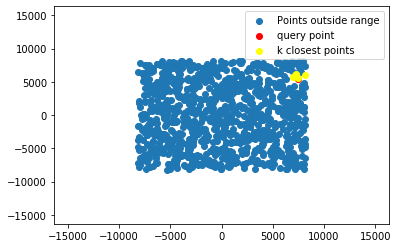

In [10]:
fig, ax = plt.subplots()
X, Y = [x[0] for x in points], [x[1] for x in points]
ax.set_xlim((min(X)-max(X), max(X)+max(X)))
ax.set_ylim((min(Y)-max(X), max(Y)+max(X)))

ax.scatter(X, Y, label = "Points outside range")
ax.scatter(query[0], query[1], color = "red", label = "query point")
ax.scatter([x[0] for x in kd_closest], [y[1] for y in kd_closest], color = "yellow", label = "k closest points")
ax.legend()
plt.show()